In [34]:
import pandas as pd

raw = [
    {"date": "2026-01-01", "menu": "Americano", "price": "4500원", "qty": "2", "paid": "TRUE"},
    {"date": "2026/01/01", "menu": "Latte",     "price": "5,000",  "qty": 1,   "paid": "True"},
    {"date": "2026-01-02", "menu": "Latte",     "price": None,     "qty": 2,   "paid": "FALSE"},
    {"date": "2026-01-03", "menu": "Mocha",     "price": "5500",   "qty": None,"paid": True},
    {"date": "2026-01-03", "menu": "Americano", "price": "4500",   "qty": 1,   "paid": "TRUE"},
    {"date": "2026-01-04", "menu": "Latte",     "price": "5000원", "qty": "3", "paid": "TRUE"},
    {"date": "2026-01-05", "menu": "Tea",       "price": "4000",   "qty": "1", "paid": "TRUE"},
]

df = pd.DataFrame(raw)
df

,date,menu,price,qty,paid
0,2026-01-01,Americano,4500원,2,TRUE
1,2026/01/01,Latte,"5,000",1,True
2,2026-01-02,Latte,None,2,FALSE
3,2026-01-03,Mocha,5500,None,True
4,2026-01-03,Americano,4500,1,TRUE
5,2026-01-04,Latte,5000원,3,TRUE
6,2026-01-05,Tea,4000,1,TRUE


In [35]:
s = pd.Series([10, 20, 30], name="score")
s

0    10
1    20
2    30
Name: score, dtype: int64

In [36]:
df.head()
df.shape
df.columns

Index(['date', 'menu', 'price', 'qty', 'paid'], dtype='object')

In [37]:
df.dtypes

date     object
menu     object
price    object
qty      object
paid     object
dtype: object

In [38]:
df.isna().sum()

date     0
menu     0
price    1
qty      1
paid     0
dtype: int64

In [39]:
df["date"] = pd.to_datetime(df["date"], errors="coerce", format="mixed")
df["date"]

0   2026-01-01
1   2026-01-01
2   2026-01-02
3   2026-01-03
4   2026-01-03
5   2026-01-04
6   2026-01-05
Name: date, dtype: datetime64[ns]

In [40]:
df["price"] = (
    df["price"]
      .astype("string")
      .str.replace("원", "", regex=False)
      .str.replace(",", "", regex=False)
)

df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["price"]

0    4500
1    5000
2    <NA>
3    5500
4    4500
5    5000
6    4000
Name: price, dtype: Int64

In [41]:
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")
df["qty"]

0    2.0
1    1.0
2    2.0
3    NaN
4    1.0
5    3.0
6    1.0
Name: qty, dtype: float64

In [42]:
df["paid"] = df["paid"].astype("string").str.upper()
df["paid"] = df["paid"].map({"TRUE": True, "FALSE": False})
df["paid"]

0     True
1     True
2    False
3     True
4     True
5     True
6     True
Name: paid, dtype: bool

In [43]:
df[["price", "qty"]] = df[["price", "qty"]].fillna(0)
df.isna().sum()

date     0
menu     0
price    0
qty      0
paid     0
dtype: int64

In [44]:
df["sales"] = df["price"] * df["qty"]
df

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


In [45]:
df.isna().sum()

date     0
menu     0
price    0
qty      0
paid     0
sales    0
dtype: int64

<Axes: xlabel='menu'>

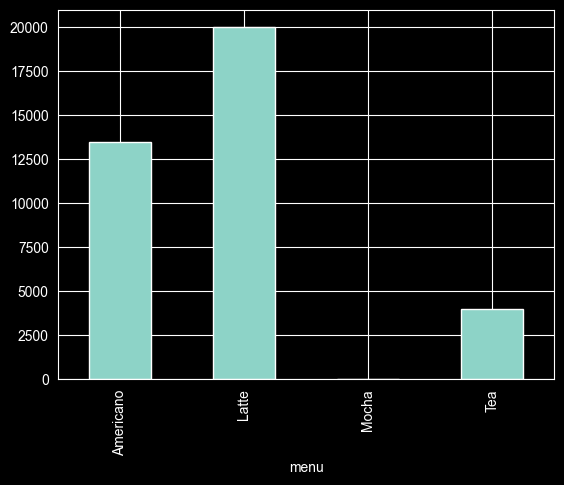

In [46]:
df.groupby("menu")["sales"].sum().plot(kind="bar")

In [48]:
df.to_csv("cafe_sales_clean.csv", index=False, encoding="utf-8-sig")

In [50]:
df_csv = pd.read_csv("cafe_sales_clean.csv")
df_csv.head(10)

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2.0,True,9000.0
1,2026-01-01,Latte,5000,1.0,True,5000.0
2,2026-01-02,Latte,0,2.0,False,0.0
3,2026-01-03,Mocha,5500,0.0,True,0.0
4,2026-01-03,Americano,4500,1.0,True,4500.0
5,2026-01-04,Latte,5000,3.0,True,15000.0
6,2026-01-05,Tea,4000,1.0,True,4000.0


In [51]:
df.to_excel("cafe_sales_clean.xlsx", index=False)

In [52]:
df_xlsx = pd.read_excel("cafe_sales_clean.xlsx")
df_xlsx.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


In [54]:
df.to_json("cafe_sales_clean.json", orient="records", force_ascii=False, indent=2)

In [55]:
df_json = pd.read_json("cafe_sales_clean.json")
df_json.head()

,date,menu,price,qty,paid,sales
0,2026-01-01,Americano,4500,2,True,9000
1,2026-01-01,Latte,5000,1,True,5000
2,2026-01-02,Latte,0,2,False,0
3,2026-01-03,Mocha,5500,0,True,0
4,2026-01-03,Americano,4500,1,True,4500


In [ ]:
df.groupby("menu")["sales"].sum()

In [56]:
paid_df = df[df["paid"] == True]
paid_df.to_csv("cafe_sales_paid_only.csv", index=False, encoding="utf-8-sig")